In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import json

import torch
from torchvision.utils import save_image
import networkx as nx
from matplotlib import pyplot as plt

from minimal.arch import Generator
from minimal.dataset import FloorplanGraphDataset
from minimal.utils import (
    init_input,
    draw_masks,
    draw_graph
)

%matplotlib inline

In [3]:
PRETRAINED_PATH = "./checkpoints/pretrained.pth"
DATA_PATH = "./data/sample_list.txt"
OUT_PATH = "./dump"

In [4]:
fp_dataset = FloorplanGraphDataset(DATA_PATH)

In [5]:
model = Generator()
model.load_state_dict(
    torch.load(PRETRAINED_PATH, map_location=torch.device("cpu")), strict=True
)
model = model.eval()

In [6]:
sample = next(iter(fp_dataset))

In [8]:
@torch.no_grad()
def _infer(nds, eds, prev_state=None):
    z, masks_in = init_input(nds, prev_state)
    masks = model(z, masks_in, nds, eds)

    return masks.detach().numpy()

In [9]:
NUM_ITERS = 10

_, nds, eds = sample
graph = [nds, eds]

rms_type_z = np.where(nds==1)[1]
_types = sorted(list(set(rms_type_z)))
selected_types = [_types[:k+1] for k in range(NUM_ITERS)]

In [15]:
state = { "masks": None, "fixed_nodes": [] }

# (R, 64, 64): mask per room
masks = _infer(nds, eds, state)

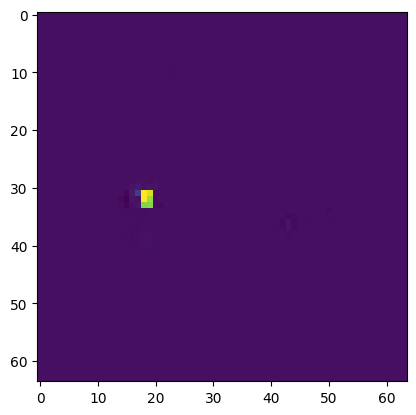

In [16]:
plt.imshow(masks[-1])

In [19]:
2 not in rms_type_z

False

In [21]:
torch.long

torch.int64

In [23]:
a = torch.randn(12, 64, 60)
b = torch.randn(12, 64, 60)

In [25]:
torch.stack((a, b), dim=1).shape

torch.Size([12, 2, 64, 60])